<a href="https://www.kaggle.com/code/haddonalexander25/eda-with-supermarket-sales?scriptVersionId=98482877" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

The intention of this exercise is to practice implementing the material from IBM's Exploratory Data Analysis for Machine Learning Course. This exercise is divided up into three parts, feature encoding, feature scaling, and hypothesis testing. The scaling and hot encoding are being done as if the target variable is the rating of the shopper's experience. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

open_file = open("../input/supermarket-sales/supermarket_sales - Sheet1.csv")

df = pd.read_csv(open_file)

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


Upon first look, it does not seem as though there are any null or missing values. Next I'll take a look at some of the data distributions using matplotlib histograms. 

Histogram for Invoice ID


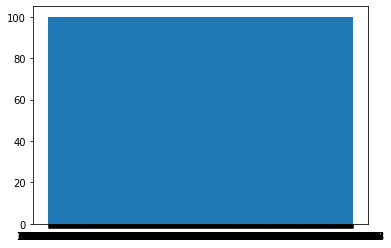



Histogram for Branch


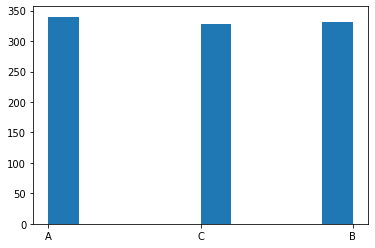



Histogram for City


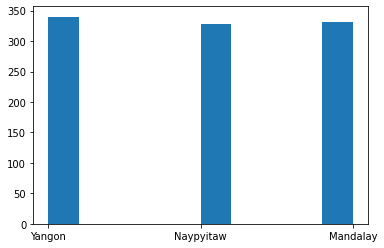



Histogram for Customer type


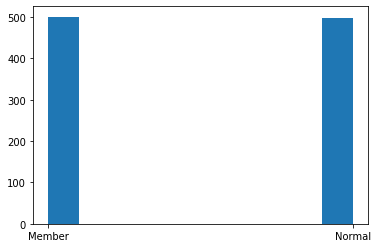



Histogram for Gender


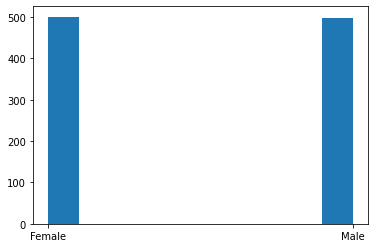



Histogram for Product line


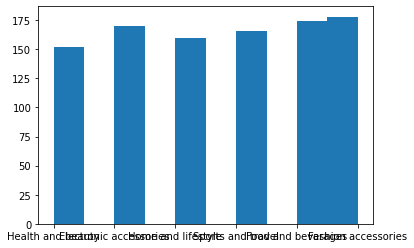



Histogram for Unit price


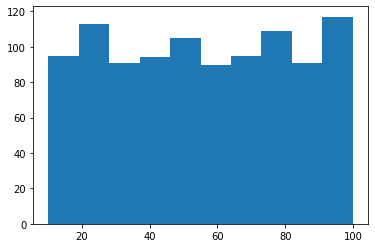



Histogram for Quantity


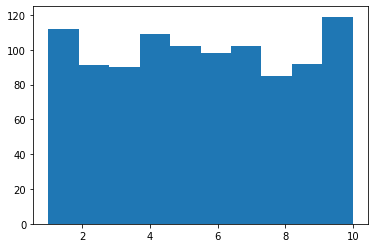



Histogram for Tax 5%


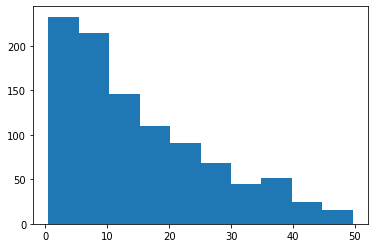



Histogram for Total


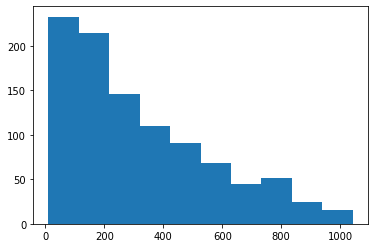



Histogram for Date


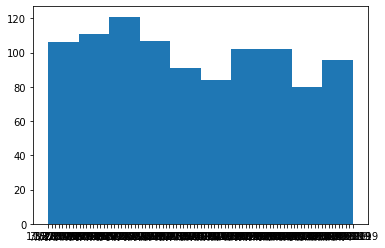



Histogram for Time


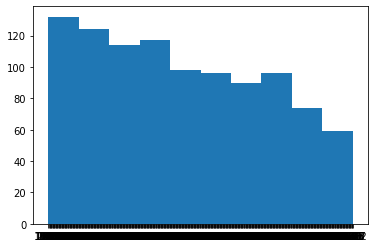



Histogram for Payment


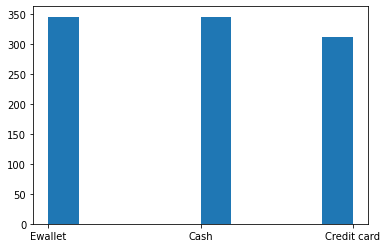



Histogram for cogs


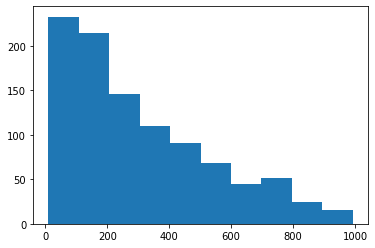



Histogram for gross margin percentage


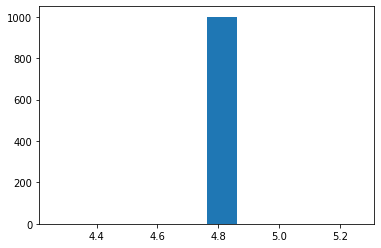



Histogram for gross income


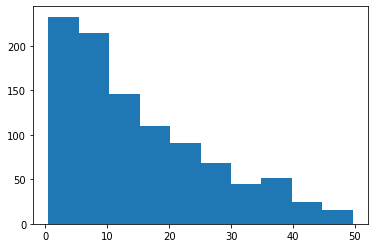



Histogram for Rating


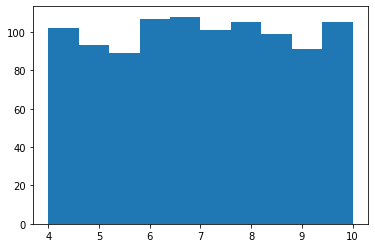

In [6]:
for i in df.columns.tolist():
    print("Histogram for %s" %(str(i)))
    plt.hist(df[i])
    plt.show()
    print("\n")

The total amount appears to have a right tailing distribution, which then causes the tax, gross profit, and cogs to have a a right tailing distribution as well. 

In [7]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
for i in df.select_dtypes(include = ["object"]).columns.tolist():
    print("Value counts for %s" %(i))
    print(df[i].value_counts())
    print("\n")

Value counts for Invoice ID
750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: Invoice ID, Length: 1000, dtype: int64


Value counts for Branch
A    340
B    332
C    328
Name: Branch, dtype: int64


Value counts for City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64


Value counts for Customer type
Member    501
Normal    499
Name: Customer type, dtype: int64


Value counts for Gender
Female    501
Male      499
Name: Gender, dtype: int64


Value counts for Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64


Value counts for Date
2/7/2019     20
2/15/2019    19
3/14/2019    18
3/2/2019     18
1/8/2019     18
             ..
1/4/2019      6
2/2

There are a number of object data types for this data set. In order to better utilize this information it would be helpful to hot encode these values. 

In [9]:
encode_list = ["Payment", "Branch", "Product line", "Gender", "Customer type", "City"]

dummies = pd.DataFrame()

for i in encode_list:
    temp = pd.get_dummies(df[i])
    dummies = pd.concat([dummies, temp], axis = 1)

In [10]:
dummies.head()

,Cash,Credit card,Ewallet,A,B,C,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Female,Male,Member,Normal,Mandalay,Naypyitaw,Yangon
0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0
2,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
3,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1
4,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1


In [11]:
df = pd.concat([df, dummies], axis = 1)

df = df.drop(columns = encode_list)

In [12]:
df

,Invoice ID,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,...,Health and beauty,Home and lifestyle,Sports and travel,Female,Male,Member,Normal,Mandalay,Naypyitaw,Yangon
0,750-67-8428,74.69,7,26.1415,548.9715,1/5/2019,13:08,522.83,4.761905,26.1415,...,1,0,0,1,0,1,0,0,0,1
1,226-31-3081,15.28,5,3.8200,80.2200,3/8/2019,10:29,76.40,4.761905,3.8200,...,0,0,0,1,0,0,1,0,1,0
2,631-41-3108,46.33,7,16.2155,340.5255,3/3/2019,13:23,324.31,4.761905,16.2155,...,0,1,0,0,1,0,1,0,0,1
3,123-19-1176,58.22,8,23.2880,489.0480,1/27/2019,20:33,465.76,4.761905,23.2880,...,1,0,0,0,1,1,0,0,0,1
4,373-73-7910,86.31,7,30.2085,634.3785,2/8/2019,10:37,604.17,4.761905,30.2085,...,0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,40.35,1,2.0175,42.3675,1/29/2019,13:46,40.35,4.761905,2.0175,...,1,0,0,0,1,0,1,0,1,0
996,303-96-2227,97.38,10,48.6900,1022.4900,3/2/2019,17:16,973.80,4.761905,48.6900,...,0,1,0,1,0,0,1,1,0,0
997,727-02-1313,31.84,1,1.5920,33.4320,2/9/2019,13:22,31.84,4.761905,1.5920,...,0,0,0,0,1,1,0,0,0,1
998,347-56-2442,65.82,1,3.2910,69.1110,2/22/2019,15:33,65.82,4.761905,3.2910,...,0,1,0,0,1,0,1,0,0,1


I'm going to drop tax and gross margin percentage as since they are either a constant or calculated from a constant they do not add many insights for the data set. 

In [13]:
df = df.drop(columns = ["Tax 5%"], axis = 1)

In [14]:
df= df.drop(columns = ["gross margin percentage"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Invoice ID              1000 non-null   object 
 1   Unit price              1000 non-null   float64
 2   Quantity                1000 non-null   int64  
 3   Total                   1000 non-null   float64
 4   Date                    1000 non-null   object 
 5   Time                    1000 non-null   object 
 6   cogs                    1000 non-null   float64
 7   gross income            1000 non-null   float64
 8   Rating                  1000 non-null   float64
 9   Cash                    1000 non-null   uint8  
 10  Credit card             1000 non-null   uint8  
 11  Ewallet                 1000 non-null   uint8  
 12  A                       1000 non-null   uint8  
 13  B                       1000 non-null   uint8  
 14  C                       1000 non-null   u

In [16]:
from sklearn.preprocessing import RobustScaler

scaled_features = ["Unit price", "Quantity", "Total", "cogs", "gross income"]

numerical_df = df[scaled_features]

scaler = RobustScaler()

for i in scaled_features:
    df[i] = scaler.fit_transform(numerical_df[[i]])

df

,Invoice ID,Unit price,Quantity,Total,Date,Time,cogs,gross income,Rating,Cash,...,Health and beauty,Home and lifestyle,Sports and travel,Female,Male,Member,Normal,Mandalay,Naypyitaw,Yangon
0,750-67-8428,0.431869,0.4,0.850677,1/5/2019,13:08,0.850677,0.850677,9.1,0,...,1,0,0,1,0,1,0,0,0,1
1,226-31-3081,-0.886596,0.0,-0.500473,3/8/2019,10:29,-0.500473,-0.500473,9.6,1,...,0,0,0,1,0,0,1,0,1,0
2,631-41-3108,-0.197514,0.4,0.249843,3/3/2019,13:23,0.249843,0.249843,7.4,0,...,0,1,0,0,1,0,1,0,0,1
3,123-19-1176,0.066356,0.6,0.677951,1/27/2019,20:33,0.677951,0.677951,8.4,0,...,1,0,0,0,1,1,0,0,0,1
4,373-73-7910,0.689747,0.4,1.096858,2/8/2019,10:37,1.096858,1.096858,5.3,0,...,0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,-0.330226,-0.8,-0.609581,1/29/2019,13:46,-0.609581,-0.609581,6.2,0,...,1,0,0,0,1,0,1,0,1,0
996,303-96-2227,0.935419,1.0,2.215567,3/2/2019,17:16,2.215567,2.215567,4.4,0,...,0,1,0,1,0,0,1,1,0,0
997,727-02-1313,-0.519086,-0.8,-0.635337,2/9/2019,13:22,-0.635337,-0.635337,7.7,1,...,0,0,0,0,1,1,0,0,0,1
998,347-56-2442,0.235020,-0.8,-0.532494,2/22/2019,15:33,-0.532494,-0.532494,4.1,1,...,0,1,0,0,1,0,1,0,0,1


Now I will conduct a few hypothesis tests on the data. The first hypothesis tests is to do an ANOVA test on the average gross income for each branch. In other words, I'm going to do an ANOVA test to see if the store branch is significant to the average sales per customer. I'll use a level of significance of .05.

In [17]:
import scipy.stats as stats

df_a = df[df["A"] == 1]

df_b = df[df["B"] == 1]

df_c = df[df["C"] == 1]

fvalue, pvalue = stats.f_oneway(df_a["gross income"], df_b["gross income"], df_c["gross income"])
print(fvalue, pvalue)

0.8845828327760515 0.413210174367147


As you can see our p value is much higher than the significance level of .05. This tells me that the store branch is not significant for the average gross income. 

Next I am going to see if there is a difference in the amount spent for males vs females. The hypothesis test is that males are spending more than females at the store. The null hypothesis is that the spending of both groups are equal and the alternative hypothesis being that males spend more than females. 

In [18]:
males = df[df["Male"] == 1]
females = df[df["Female"] == 1]

t_value,p_value=stats.ttest_ind(males["Total"],females["Total"])

print(f"Test statistic is {t_value}")

print(f"p-value for one tailed test is {p_value}")

alpha = 0.025
      
if p_value > alpha:
      print("Null hypothesis is supported")
      
else:
      print("Null hypothesis rejected")
      

Test statistic is -1.5641266415241006
p-value for one tailed test is 0.11810484577135731
Null hypothesis is supported


From our hypothesis test it looks like there is not enough evidence to reject the null hypothesis. 

The next hypothesis test is another ANOVA test to see if there is a statistical difference between the average rating for each store. Again, the null hypothesis is that there is not a statistical difference, with the alternative hypothesis being at least one is statistically different. 

In [19]:
fvalue, pvalue = stats.f_oneway(df_a["Rating"], df_b["Rating"], df_c["Rating"])
print(f'p-value for the ANOVA test is {pvalue}')

alpha = .025

if p_value > alpha:
      print("Null hypothesis is supported")
      
else:
      print("Null hypothesis rejected")
      

p-value for the ANOVA test is 0.12603841851334457
Null hypothesis is supported


It looks like there is not a statistical difference between the ratings for the different stores. 

At this point, the exercise in EDA is wrapped up. To conclude, I went through the following activities:

- one hot encoding categorical values
- scaling data 
- conducting basic hypothesis testing using t-tests and one way ANOVA tests 